In [1]:
# prompt: please, I need your help to mount the drive from google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.datasets import make_regression

In [ ]:
# prompt: import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
# print("Path to dataset files:", path)

!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression
!unzip salary-dataset-simple-linear-regression.zip
path = "/content/salary_data.csv" # Update the path if necessary
print("Path to dataset files:", path)


In [34]:
# Carregar dados
import pandas as pd # Import the pandas library and assign it to the alias 'pd'
dados = pd.read_csv("/content/Salary_dataset.csv")
dados.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


   Unnamed: 0  YearsExperience      Salary
0           0         0.614500   33.460587
1           1         1.553733   67.994528
2           2         0.093895   18.674234
3           3         1.824848  114.049968
4           4        -0.210325  -20.566629


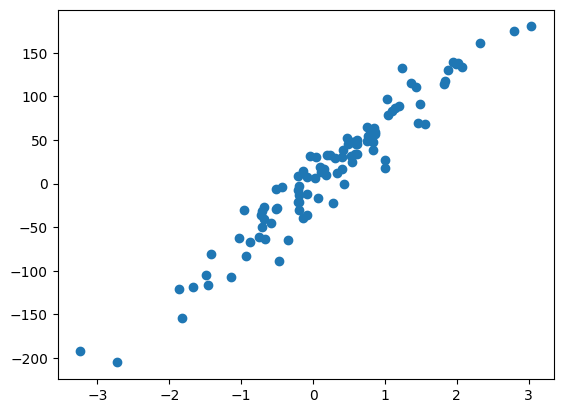

In [38]:
# Now you can use make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=20)

# Create a DataFrame
dados_synthetic = pd.DataFrame(X, columns=['YearsExperience'])
dados_synthetic['Salary'] = y

# If you want to replace the original data in 'dados':
dados[['YearsExperience', 'Salary']] = dados_synthetic[['YearsExperience', 'Salary']]
print(dados.head())

plt.scatter(X,y)
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(dados[['YearsExperience']], dados['Salary'])

LinearRegression()

In [ ]:
model.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


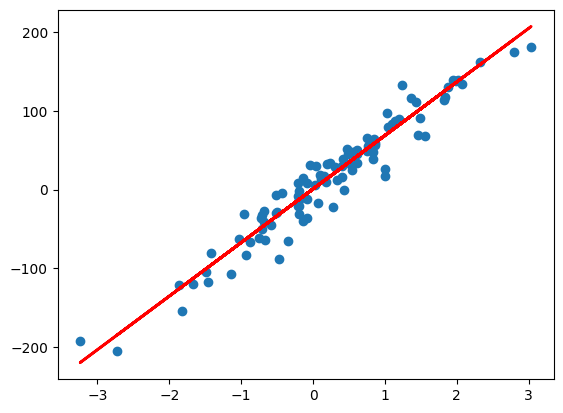

In [45]:
plt.scatter(X,y)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.show()

In [52]:
rsquare = sklearn.metrics.r2_score(y, model.predict(X),
                                 sample_weight=None,
                                 multioutput='uniform_average',
                                 force_finite=True)

print("r2 = ", f"{rsquare:.2f}")

r2 =  0.94


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


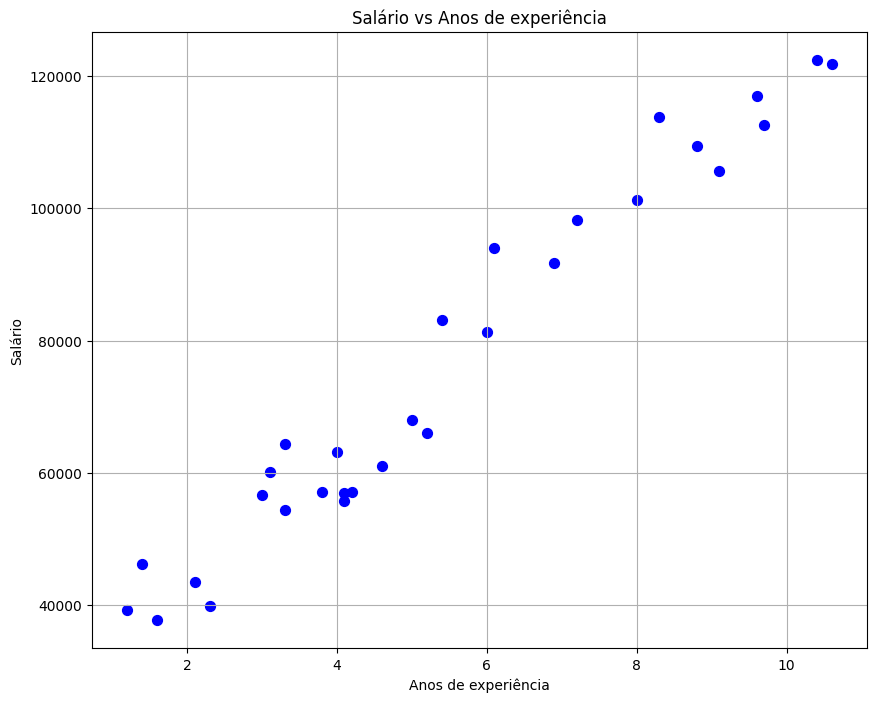

In [46]:
# prompt: Using dataframe dados: /content/Salary_dataset.csv

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe.
# Assuming the file is in the same directory as the script.  If not,
# specify the full path to the file.
dados = pd.read_csv('/content/Salary_dataset.csv')

# Check the first few rows
# print(dados.head())

# Create the scatter plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.scatter(dados['YearsExperience'], dados['Salary'], color='blue', marker='o', s=50) # s is for marker size

# Customize the plot (add labels and title)
plt.xlabel('Anos de experiência')
plt.ylabel('Salário')
plt.title('Salário vs Anos de experiência')
plt.grid(True)

# Show the plot
plt.show()
